In [3]:
import numpy as np
import pandas as pd

In [4]:
from sklearn.model_selection import train_test_split
train  = pd.read_csv('padel_train.csv')
val  = pd.read_csv('padel_valid.csv')
test  = pd.read_csv('padel_test.csv')

ncol_train = train.shape[1]-1
x_train = train.iloc[:,0:ncol_train]
y_train= train['active']

ncol_val = val.shape[1]-1
x_val = val.iloc[:,0:ncol_val]
y_val= val['active']

ncol_test = test.shape[1]-1
x_test = test.iloc[:,0:ncol_test]
y_test= test['active']

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_val =  sc.transform(x_val)
x_test = sc.transform(x_test)

In [6]:
from supervised.automl import AutoML
automl = AutoML(mode="Compete")
automl.fit(x_train, y_train)

AutoML directory: AutoML_3
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree logloss 0.512406 trained in 0.81 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 10-fold CV Shuffle,Stratify
* Step simple_algorithms will try to check up to 4 models
1_DecisionTree logloss 0.401806 trained in 4.48 seconds
2_DecisionTree logloss 0.518322 trained in 5.79 seconds
3_DecisionTree logloss 0.549039 trained in 7.25 s

AutoML(mode='Compete')

In [7]:
# compute the accuracy on test data
from sklearn.metrics import accuracy_score
predictions = automl.predict_all(x_test)
print(predictions.head())
print("Test accuracy:", accuracy_score(y_test, predictions["label"].astype(int)))

   prediction_0  prediction_1  label
0      0.964091      0.035909      0
1      0.095015      0.904985      1
2      0.674020      0.325980      0
3      0.129073      0.870927      1
4      0.089049      0.910951      1
Test accuracy: 0.9064039408866995


0.9629822570342393
0.9541917914802567


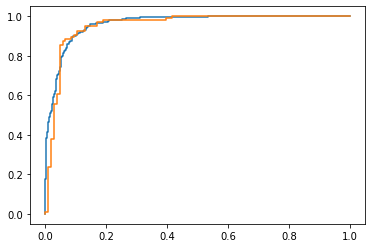

In [8]:
y_pred1 = automl.predict_all(x_train) 
y_pred2 = automl.predict_all(x_test)
from sklearn.metrics import roc_curve, roc_auc_score
fpr1, tpr1, threshold1 = roc_curve(y_train, automl.predict_proba(x_train)[:, 1])
fpr2, tpr2, threshold2 = roc_curve(y_test, automl.predict_proba(x_test)[:, 1])
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(fpr1, tpr1, label="ROC Curve of train for mljar")
plt.plot(fpr2, tpr2, label="ROC Curve of test formljar")
auc1 = roc_auc_score(y_train, automl.predict_proba(x_train)[:, 1])
auc2 = roc_auc_score(y_test, automl.predict_proba(x_test)[:, 1])
print (auc1)
print (auc2)